<a href="https://colab.research.google.com/github/luthfiah22/DataPrepocessing/blob/main/SC61715_Luthfiah_Tuti_Amalia_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Dataset

In [ ]:
# import dataset
# download it here: https://drive.google.com/file/d/13LzR8frHF4y5b7ogVw9DnDMHXiURsYRc/view?usp=sharing
dataset = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

print(dataset)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [ ]:
# mengecek tipe data
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# melihat cuplikan dataset
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# statistika deskriptif
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# menghitung berapa kali nilai 0 (no disease) dan nilai 1 (disease) muncul dalam kolom 'target'
counts = dataset['target'].value_counts()

print("0 (no disease):", counts[0])
print("1 (disease):", counts[1])

0 (no disease): 499
1 (disease): 526


## Missing Value

In [ ]:
# checking for missing values
dataset.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# checking the number of missing data
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dataset.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

## Duplicate Value

In [ ]:
# check duplicate values
dataset[dataset.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
dataset[dataset.duplicated(keep=False)].any()

age         True
sex         True
cp          True
trestbps    True
chol        True
fbs         True
restecg     True
thalach     True
exang       True
oldpeak     True
slope       True
ca          True
thal        True
target      True
dtype: bool

In [ ]:
dataset.duplicated().sum()

723

### Handling Duplicate Value

In [ ]:
# jumlah duplicate value sebelum penghapusan
dataset.duplicated().sum()

723

In [ ]:
# dropping duplicate values
dataset = dataset.drop_duplicates()
dataset = dataset.reset_index(drop = True)
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
# jumlah duplicate value setelah penghapusan
dataset.duplicated().sum()

0

## Outlier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
kolom_kolom = ['age', 'trestbps','chol', 'thalach', 'oldpeak']

batas_kolom = {}

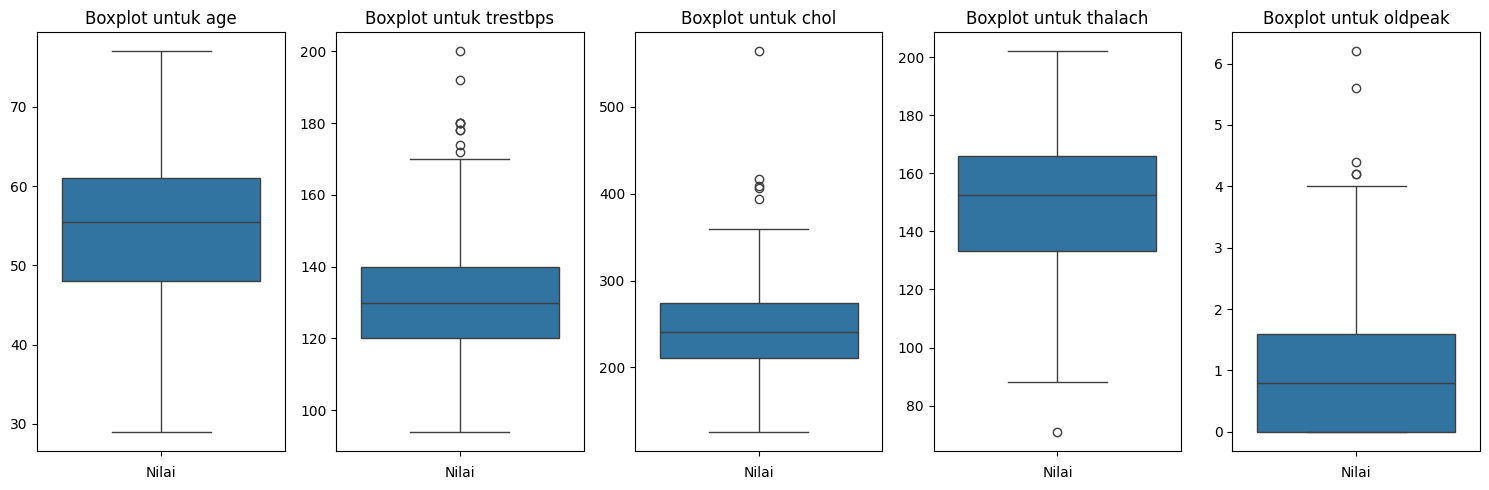

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(kolom_kolom), figsize=(15, 5))

for i, kolom in enumerate(kolom_kolom):
    sns.boxplot(y=dataset[kolom], ax=axes[i])
    axes[i].set_title(f'Boxplot untuk {kolom}')
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
for kolom in kolom_kolom:
    Q1 = dataset[kolom].quantile(0.25)
    Q3 = dataset[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    batas_kolom[kolom] = (lower_bound, upper_bound)

outliers = {}
for kolom in kolom_kolom:
    lower_bound, upper_bound = batas_kolom[kolom]
    outliers[kolom] = dataset[(dataset[kolom] < lower_bound) | (dataset[kolom] > upper_bound)]

In [ ]:
for kolom, (lower_bound, upper_bound) in batas_kolom.items():
    print(f"Kolom '{kolom}':")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print()

Kolom 'age':
Lower Bound: 28.5
Upper Bound: 80.5

Kolom 'trestbps':
Lower Bound: 90.0
Upper Bound: 170.0

Kolom 'chol':
Lower Bound: 115.375
Upper Bound: 370.375

Kolom 'thalach':
Lower Bound: 84.125
Upper Bound: 215.125

Kolom 'oldpeak':
Lower Bound: -2.4000000000000004
Upper Bound: 4.0



In [ ]:
print(f"Outliers pada kolom 'age':")
outliers['age']

Outliers pada kolom 'age':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
print(f"Outliers pada kolom 'trestbps':")
outliers['trestbps']

Outliers pada kolom 'trestbps':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
44,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
76,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
112,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
124,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
142,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
226,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
248,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
271,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


In [ ]:
print(f"Outliers pada kolom 'chol':")
outliers['chol']

Outliers pada kolom 'chol':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
104,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
128,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
144,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
183,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
260,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [ ]:
print(f"Outliers pada kolom 'thalach':")
outliers['thalach']

Outliers pada kolom 'thalach':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
188,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [ ]:
print(f"Outliers pada kolom 'oldpeak':")
outliers['oldpeak']

Outliers pada kolom 'oldpeak':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
51,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
63,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
271,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


### Handling Outlier

In [ ]:
# inisialisasi Dataset baru untuk menyimpan data selain outlier
dataset_no_outliers = dataset.copy()

# loop melalui setiap kolom dan hapus baris yang merupakan outlier
for kolom in kolom_kolom:
    lower_bound, upper_bound = batas_kolom[kolom]
    dataset_no_outliers = dataset_no_outliers[~((dataset_no_outliers[kolom] < lower_bound) | (dataset_no_outliers[kolom] > upper_bound))].reset_index(drop=True)

# cetak Dataset baru yang hanya berisi data selain outlier
print("Dataset baru tanpa outlier:")
dataset_no_outliers

Dataset baru tanpa outlier:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
279,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
280,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
281,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
dataset_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trestbps  283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalach   283 non-null    int64  
 8   exang     283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slope     283 non-null    int64  
 11  ca        283 non-null    int64  
 12  thal      283 non-null    int64  
 13  target    283 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.1 KB


## Imbalance data

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:
# splitting dataset into independent and dependent variable
X = dataset[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = dataset['target'].values
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   68    0   2       120   211    0        0      115      0      1.5   
298   44    0   2       108   141    0        1      175      0      0.6   
299   52    1   0       128   255    0        1      161      1      0.0   
300   59    1   3       160   273    0        0      125      0      0.0   
301   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  
0        2   2     3  
1        0   0     3  
2        0   0    

In [ ]:
print(y)

[0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1
 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1
 0 1 1 0 0 0]


In [ ]:
# sumarize class distribution
counter = Counter(y)
print(counter)

Counter({1: 164, 0: 138})


In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

# check predictor variable
print(X)

Counter({0: 164, 1: 164})
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0     52    1   0       125   212    0        1      168      0  1.000000   
1     53    1   0       140   203    1        0      155      1  3.100000   
2     70    1   0       145   174    0        1      125      1  2.600000   
3     61    1   0       148   203    0        1      161      0  0.000000   
4     62    0   0       138   294    1        1      106      0  1.900000   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
323   49    1   0       125   168    0        0      138      1  3.036511   
324   57    0   0       113   334    0        0      147      0  2.444656   
325   63    1   0       156   279    0        0      109      1  1.236964   
326   60    1   0       111   237    0        0      140      1  1.407934   
327   64    1   0       144   208    0        0      133      0  2.249358   

     slope  ca  thal  
0        2   2     3  
1  

In [ ]:
# informasi tentang target
print("Informasi tentang target:")
print("Disease :", [1])
print("No Disease :", [0])

Informasi tentang target:
Disease : [1]
No Disease : [0]


In [ ]:
status = ["Disease", "No Disease"]
prop_val =[0.5,0.5]

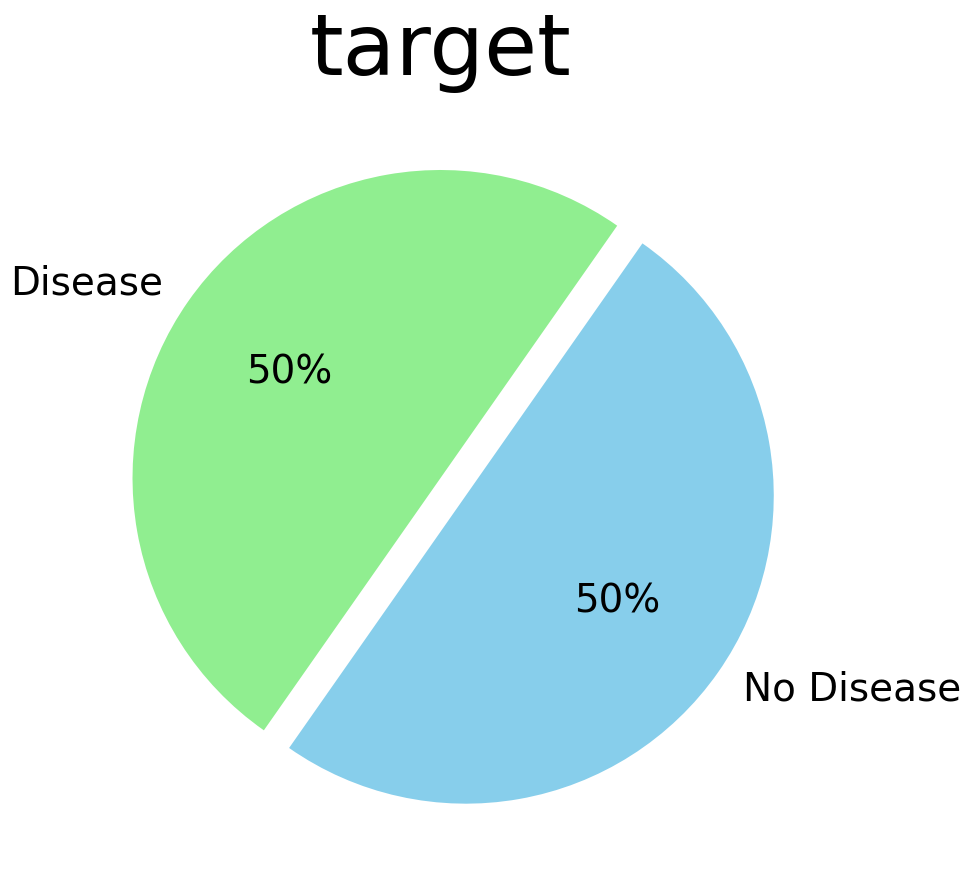

In [ ]:
# data to plot
plt.subplots(figsize = (15,10))
labels = status
sizes = prop_val
colors = ['lightgreen','skyblue']
explode = (0,0.1)

# plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.0f%%', shadow=False, startangle=55, textprops={'fontsize': 28})

plt.title('target', fontsize=62)
plt.show()

# 2. Exploratory Data Analysis (EDA)


## Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [ ]:
# informasi dataset
dataset_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trestbps  283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalach   283 non-null    int64  
 8   exang     283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slope     283 non-null    int64  
 11  ca        283 non-null    int64  
 12  thal      283 non-null    int64  
 13  target    283 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.1 KB


In [ ]:
# menampilkan tipe data dari setiap kolom
print(dataset_no_outliers.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
# categorical the features as nominal, ordinal, or numerical
features = {'age': 'numerical',
            'sex': 'nominal',
            'chest pain type': 'nominal',
            'resting blood pressure': 'numerical',
            'serum cholestoral': 'numerical',
            'fasting blood sugar': 'numerical',
            'resting electrocardiographic results': 'nominal',
            'maximum heart rate achieved': 'numerical',
            'exercise induced angina': 'nominal',
            'ST depression induced by exercise relative to rest': 'numerical',
            'the slope of the peak exercise ST segment': 'nominal',
            'number of major vessels colored by flourosopy': 'numerical',
            'thalassemia': 'nominal',
            'target': 'numerical'}

# display the categorized features
print(features)

{'age': 'numerical', 'sex': 'nominal', 'chest pain type': 'nominal', 'resting blood pressure': 'numerical', 'serum cholestoral': 'numerical', 'fasting blood sugar': 'numerical', 'resting electrocardiographic results': 'nominal', 'maximum heart rate achieved': 'numerical', 'exercise induced angina': 'nominal', 'ST depression induced by exercise relative to rest': 'numerical', 'the slope of the peak exercise ST segment': 'nominal', 'number of major vessels colored by flourosopy': 'numerical', 'thalassemia': 'nominal', 'target': 'numerical'}


## Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

In [ ]:
# kolom-kolom yang ingin dihitung  mean, median, dan modus
kolom_to_agg = ['age', 'trestbps','chol', 'thalach', 'oldpeak']

In [ ]:
dataset_no_outliers[kolom_to_agg].agg(['mean', 'median', lambda x: x.mode().iloc[0]])

,age,trestbps,chol,thalach,oldpeak
mean,54.04947,129.883392,242.314488,149.961131,0.951943
median,55.00000,130.000000,239.000000,153.000000,0.600000
<lambda>,58.00000,120.000000,197.000000,162.000000,0.000000


**Kondisi Penggunaan Mean :**

Mean atau rata-rata adalah titik di mana distribusi berada dalam keseimbangan. Jika distribusi data simetris, maka mean adalah pengukuran pusat yang baik karena akan mencerminkan nilai tengah dari data. Mean sensitif terhadap outlier, sehingga outlier dapat mempengaruhi nilai mean secara signifikan. Mean  biasanya digunakan untuk tipe data numerik.


**Kondisi Penggunaan Median :**

Median adalah titik tengah distribusi dimana jumlah nilai yang berada di atas
median sama seperti di bawahnya. Titik tengah adalah nilai tengah yang diukur
dari nilai terendah hingga nilai tertinggi. Median juga dapat dianggap sebagai persentil ke-50. Median cocok digunakan ketika data memiliki distribusi yang miring (skewness) atau ketika ada outlier dalam data. Median cocok digunakan untuk berbagai jenis tipe data, terutama ketika  memiliki data yang memiliki distribusi yang miring (skewed).


**Kondisi Penggunaan Modus :**

Modus adalah nilai yang paling sering muncul di dataset. Jika terdapat
beberapa nilai dengan frekuensi paling sering muncul sama, maka dataset bisa
mempunyai lebih dari 1 modus. Kemudian, jika frekuensi kemunculan semua nilai
pada dataset sama maka tidak ada modus. Modus digunakan untuk data kategorikal.

## Menemukan dan mendeskripsikan statistical five summaries

In [ ]:
# kolom-kolom yang ingin dihitung statistiknya
kolom_to_agg = ['age', 'trestbps','chol', 'thalach', 'oldpeak']

In [ ]:
dataset_no_outliers[kolom_to_agg].describe().loc[['min', '25%', '50%', '75%', 'max']]

,age,trestbps,chol,thalach,oldpeak
min,29.0,94.0,126.0,88.0,0.0
25%,47.0,120.0,210.5,133.5,0.0
50%,55.0,130.0,239.0,153.0,0.6
75%,60.0,140.0,270.5,168.0,1.6
max,77.0,170.0,360.0,202.0,4.0


Statistical five summaries adalah sekumpulan statistik deskriptif yang digunakan untuk memberikan gambaran ringkas tentang distribusi data. Terdapat 5 fitur statistik yaitu :

1. Minimum: Nilai terendah dalam kumpulan data.

2. Kuartil Pertama (Q1) : Nilai di mana 25% dari data berada di bawahnya. Ini juga dikenal sebagai kuartil bawah.

3. Median (Kuartil Kedua atau Q2) : Nilai tengah dalam kumpulan data. Ini adalah nilai di mana 50% dari data berada di bawahnya.

4. Kuartil Ketiga (Q3) : Nilai di mana 75% dari data berada di bawahnya. Ini juga dikenal sebagai kuartil atas.

5. Maksimum : Nilai tertinggi dalam kumpulan data.


## Mendeskripsikan distribusi data

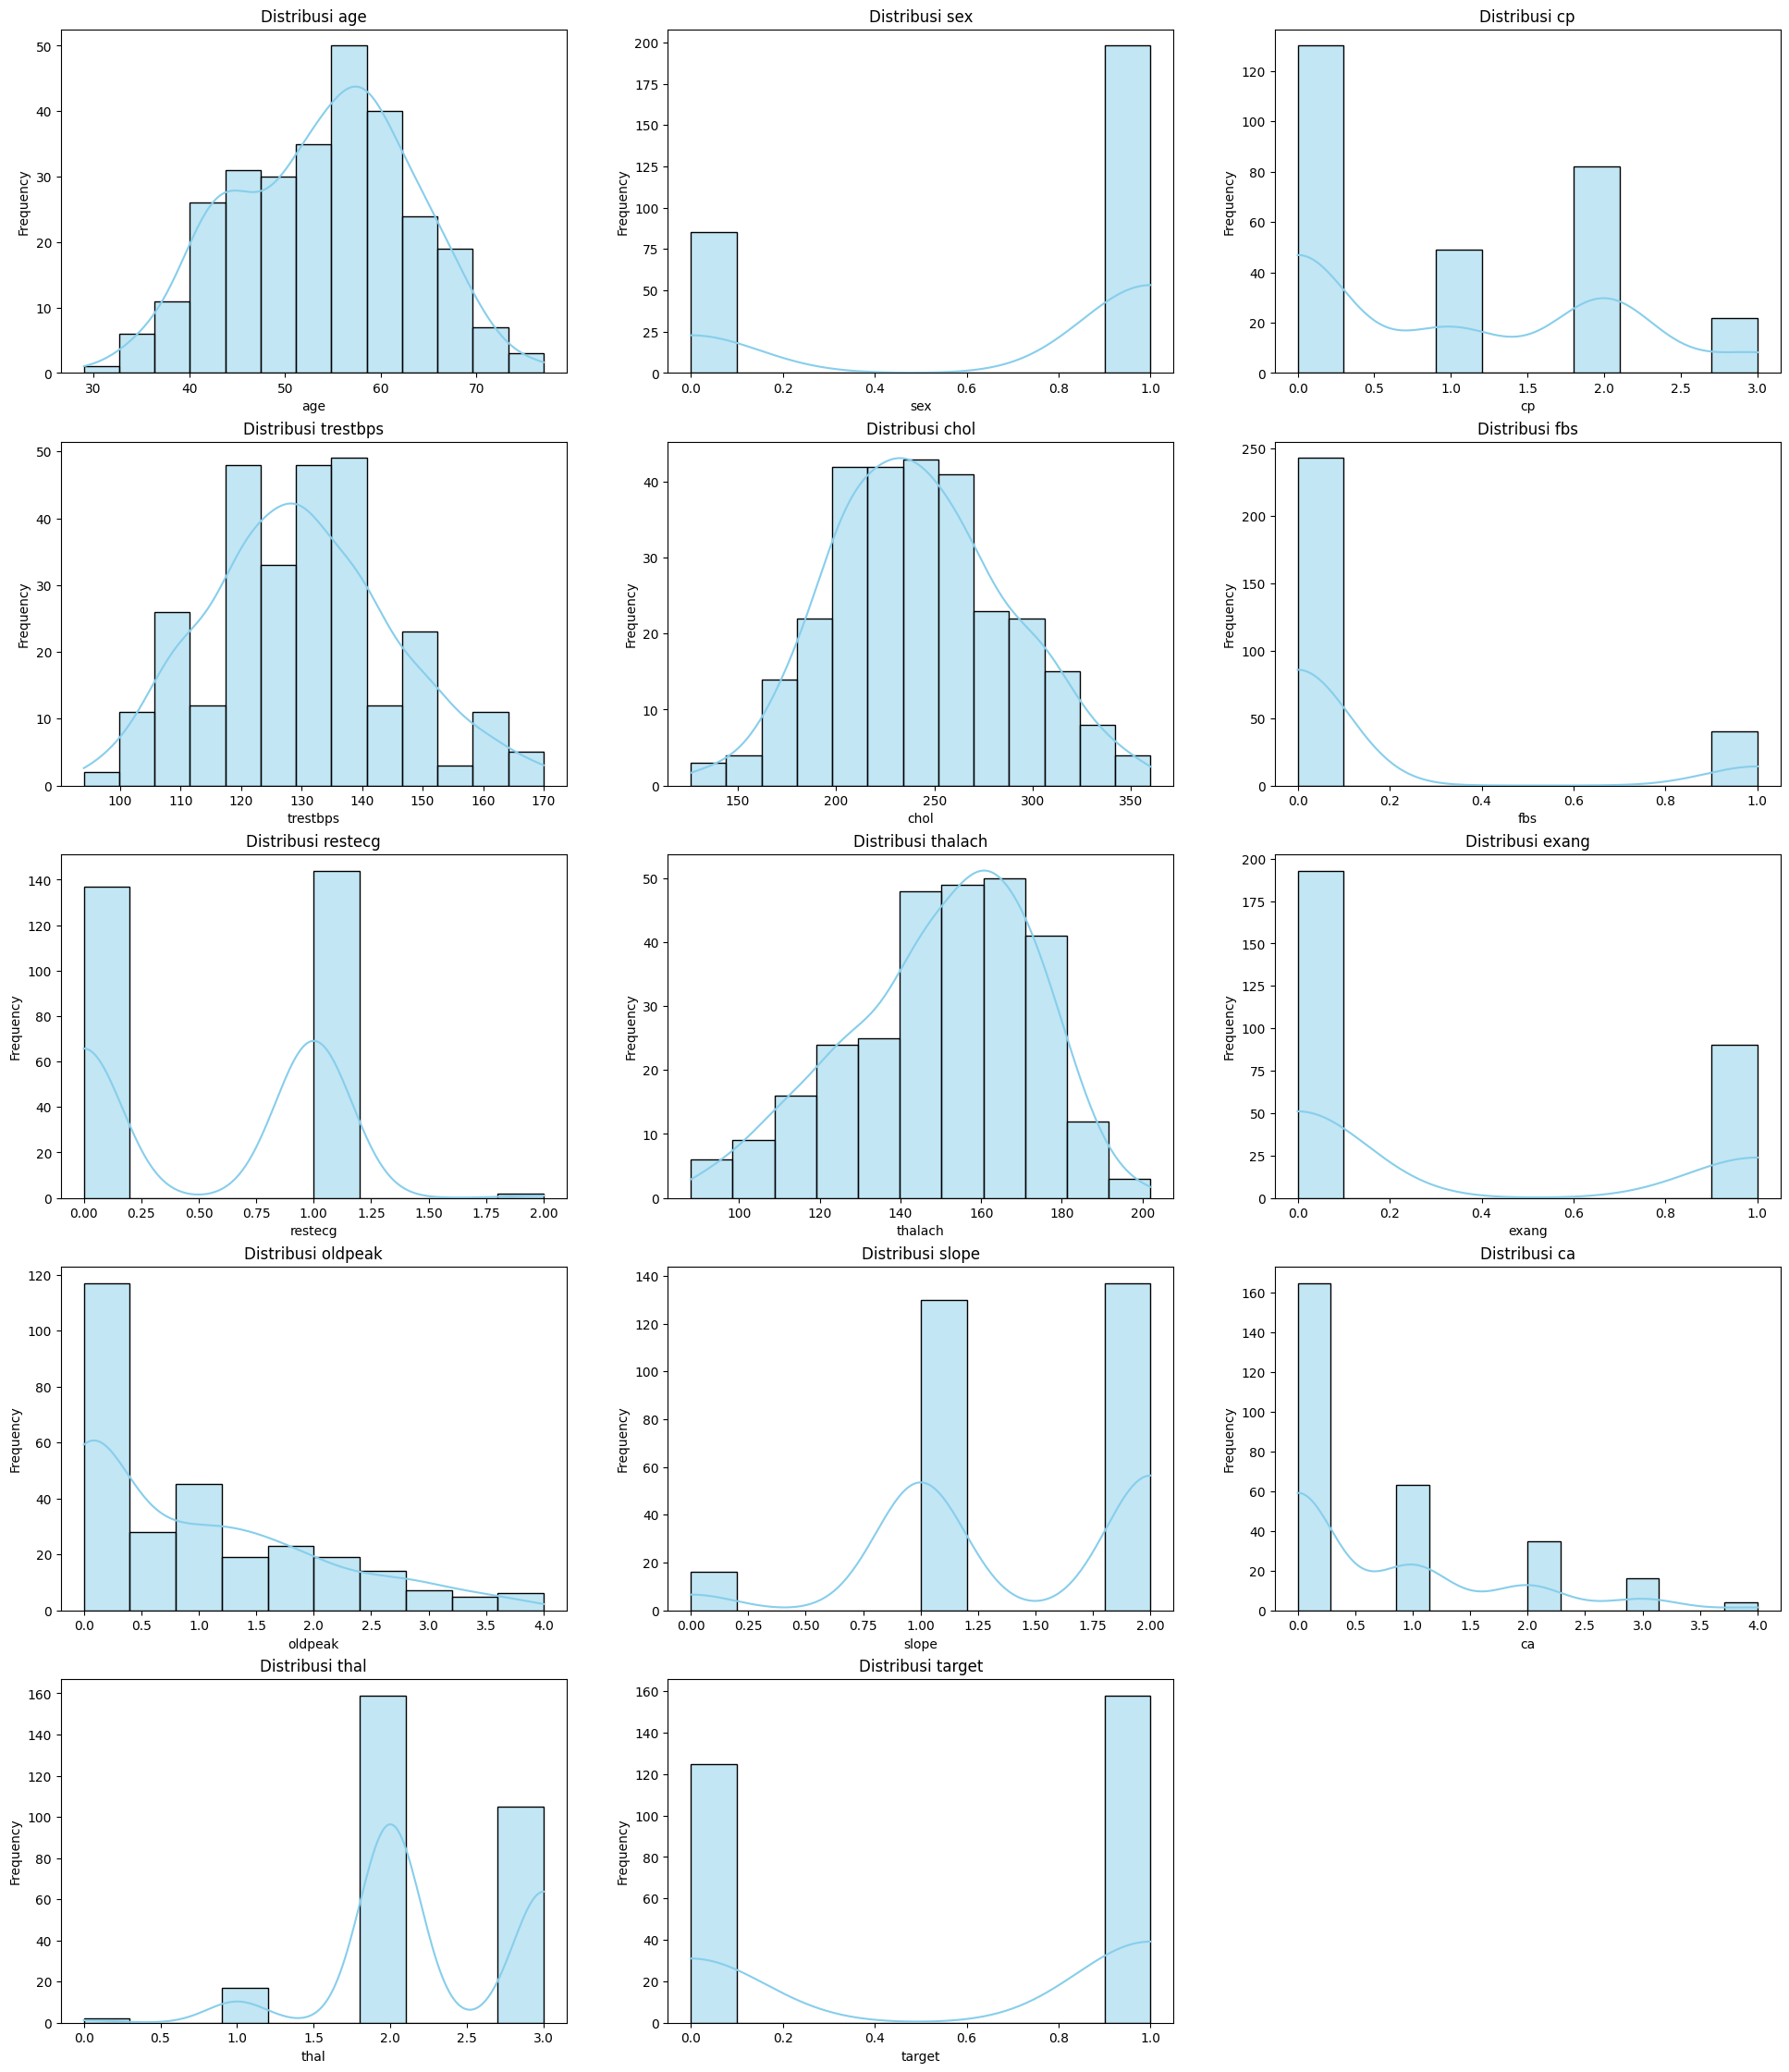

In [ ]:
numeric_kolom = dataset_no_outliers.select_dtypes(include='number').columns
num_plots = len(numeric_kolom)
num_cols = 3
num_rows = num_plots // num_cols
if num_plots % num_cols:
    num_rows += 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, 28))

for i, column in enumerate(numeric_kolom):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.histplot(dataset_no_outliers[column], kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribusi {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

for i in range(num_plots, num_rows * num_cols):
    plt.delaxes(plt.subplot(num_rows, num_cols, i + 1))

plt.show()

1. Distribusi data age menunjukkan bahwa data terdistribusi dengan normal, yaitu simetris terhadap nilai rata-rata (mean).
2. Distribusi data sex menunjukkan bahwa data terdistribusi dengan sangat tidak merata. Karena pada data ini memiliki kecenderungan data berkumpul di nilai-nilai ekstrem (minimum dan maksimum), sementara nilai-nilai di tengahnya jarang ditemukan.
3. Distribusi data cp menunjukkan persebaran data menjulur ke kanan atau data menyebar right skewed, dimana banyak data berkumpul di titik minimum data.
4. Distribusi data trestbps menunjukkan bahwa data terdistribusi dengan normal, yaitu nilai di sebelah kiri dan kanan mean memiliki kecenderungan untuk menyebar secara merata dalam distribusi.
5. Distribusi data chol yaitu menunjukkan sebaran data yang normal, hal ini berarti bahwa penyebaran data sebelah kiri dan kanan dari nilai mean (rata-rata) adalah sama.
6. Distribusi data fbs menunjukkan bahwa sebaran data sangat tidak merata, karena data banyak berkumpul di titik nilai minimum dan sisanya di titik nilai maksimum sedangkan di titik tengah jarang ditemukan.
7. Distribusi data restecg menunjukkan bahwa persebaran data tidak merata, yaitu dimana data berkumpul di titik tengah dan titik minimum data sedangkan sisanya di titik maksimum.
8. Distribusi data thalach menunjukkan persebaran data menjulur ke kiri atau left skewed, namun hampir terdistribusi dengan normal.
9. Distribusi data exang menunjukkan bahwa sebaran data terdistribusi dengan sangat tidak merata, yaitu banyak data berkumpul di titik minimum dan sisanya di titik maksimum, sedangkan di titik tengahnya tidak ada.
10. Distribusi data oldpeak menunjukkan data menyebar right skewed atau data menjulur ke kanan dan menunjukkan bahwa ekor distribusi data menunjuk ke arah positif, yaitu dimana banyak data berkumpul di titik minimum data.
11. Distribusi data slope menunjukkan data menyebar left skewed dan menunjukkan bahwa ekor distribusi data menunjuk ke arah negatif, yaitu data berkumpul di titik maksimum data.
12. Distribusi data ca menunjukkan bahwa data menyebar right skewed atau data menjulur ke kanan dan menunjukkan bahwa ekor distribusi data menunjuk ke arah positif, yaitu dimana banyak data berkumpul di titik minimum data.  
13. Distribusi data thal menunjukkan data menyebar left skewed dan menunjukkan bahwa ekor distribusi data menunjuk ke arah negatif, yaitu data berkumpul di titik maksimum data.
14. Distribusi data target menunjukkan bahwa sebaran data sangat tidak merata, karena data banyak berkumpul di titik nilai maksimum dan sisanya di titik nilai minimum sedangkan di titik tengah jarang ditemukan.

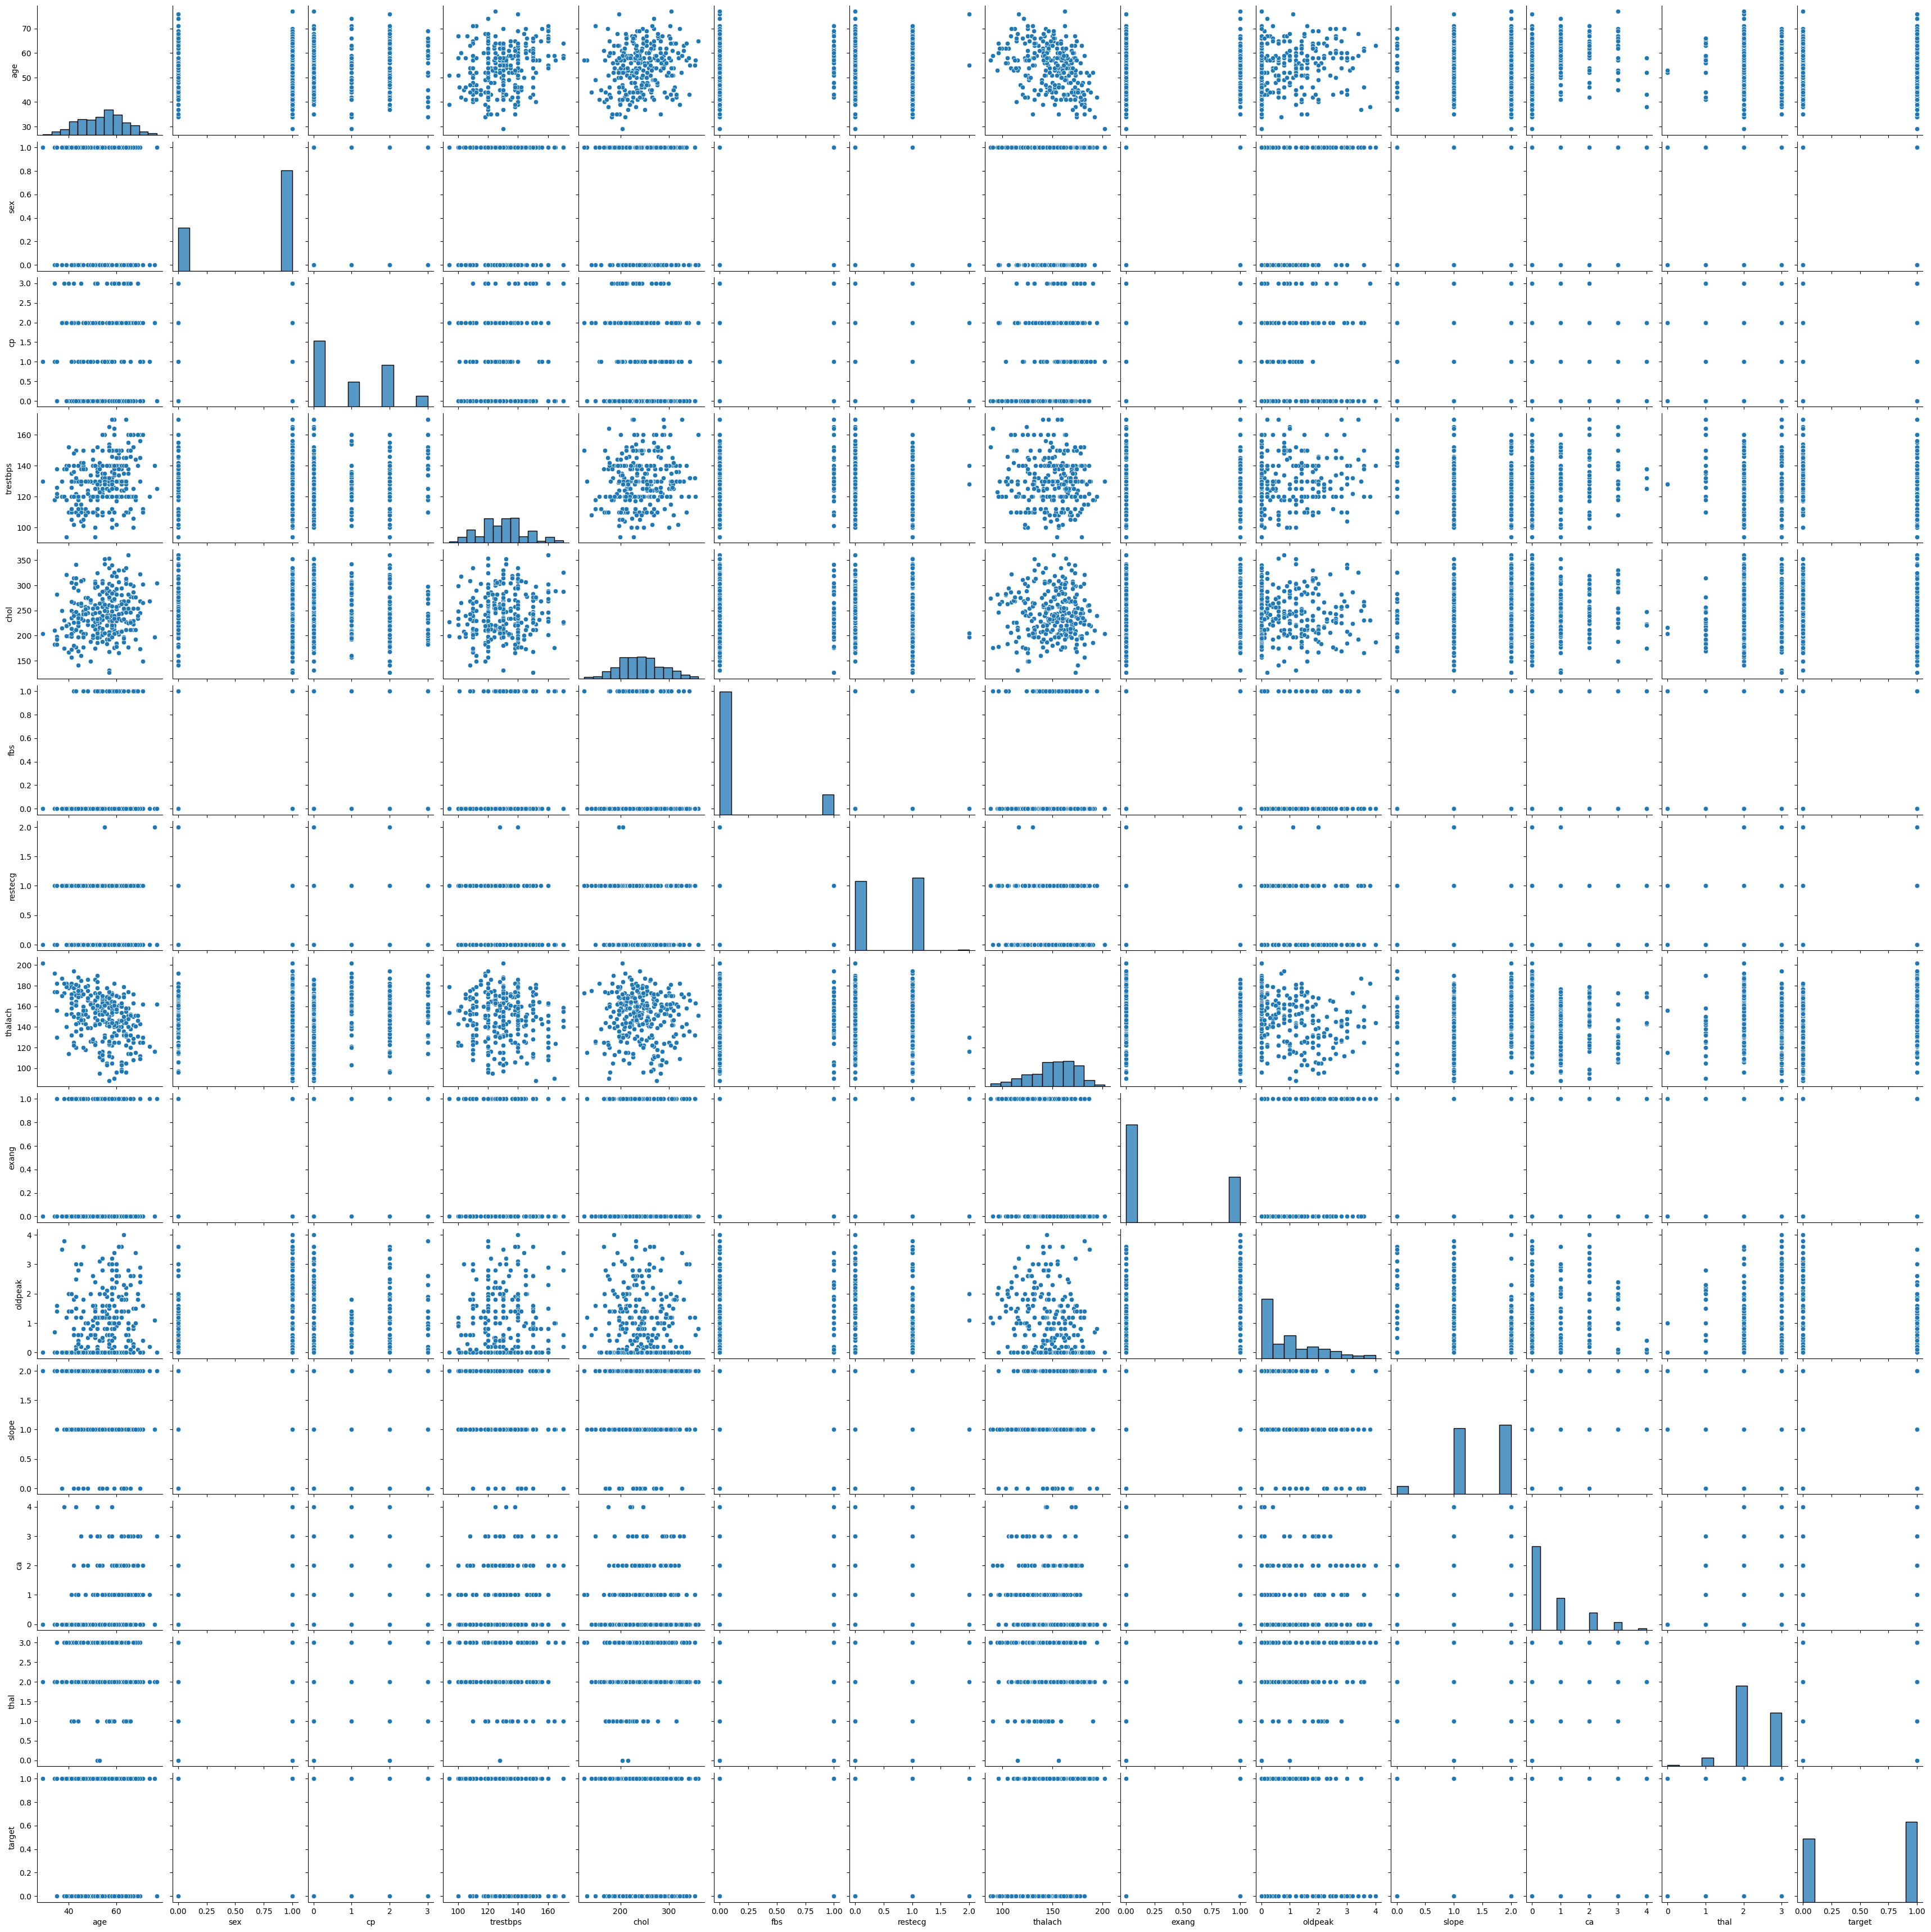

In [ ]:
# hubungan antar variabel
sns.pairplot(dataset_no_outliers)
plt.show()

# 3. Feature Engineering

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# load dataset mentah
dataset = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

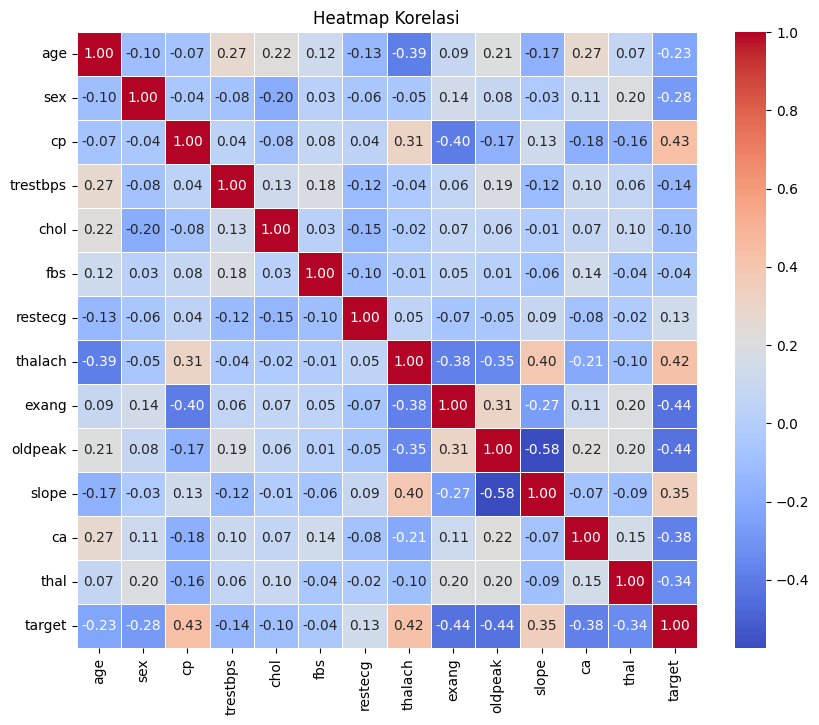

In [ ]:
# hitung matriks korelasi
correlation_matrix = dataset.corr()

# buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

## 10 Fitur Baru

1. Fitur Baru "Kategori Usia Paling Banyak Terkena Penyakit Jantung"

In [ ]:
# menentukan batas-batas kategori usia dan label-labelnya
bins = [29, 40, 50, 60, 70, 80]
labels = ['muda', 'dewasa', 'tua', 'sangat tua', 'lanjut usia']

# membuat kolom baru 'age_category' dengan menggunakan pd.cut()
dataset['age_category'] = pd.cut(dataset['age'], bins=bins, labels=labels)

print(dataset.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target age_category  
0   2     3       0          tua  
1   0     3       0          tua  
2   0     3       0   sangat tua  
3   1     3       0   sangat tua  
4   3     2       0   sangat tua  


In [ ]:
# menghitung frekuensi kemunculan setiap kategori usia
age_category_counts = dataset['age_category'].value_counts()

print(age_category_counts)

tua            438
sangat tua     252
dewasa         247
muda            64
lanjut usia     20
Name: age_category, dtype: int64


In [ ]:
# mengelompokkan data berdasarkan kolom 'age_category' dan menghitung jumlah kasus penyakit jantung dalam setiap kelompok usia
heart_disease_counts = dataset.groupby(['age_category', 'target']).size().unstack()

# menampilkan kelompok usia dengan jumlah kasus penyakit jantung tertinggi
most_affected_age_group = heart_disease_counts[1].idxmax()

print("Kelompok usia dengan jumlah kasus penyakit jantung tertinggi:", most_affected_age_group)

Kelompok usia dengan jumlah kasus penyakit jantung tertinggi: tua


Kesimpulan :
Berdasarkan fitur baru tersebut, dapat ditarik kesimpulan bahwa rumah sakit dapat mengetahui pasien mana yang harus diprioritaskan karena penyakit jantung. Ditemukan hasil bahwa pasien yang paling banyak terkena penyakit jantung adalah kelompok usia tua dengan kisaran usia 50 tahun sampai 60 tahun yaitu sebanyak 438 pasien.

Saran :
Rumah sakit dapat menghadapi tantangan permasalahan mengenai banyaknya kelompok usia tua yang terkena penyakit jantung dengan membuat sosialisasi tentang penyakit jantung kepada warga masyarakat supaya penyakit jantung dapat ditangani lebih dini. Rumah sakit juga dapat mengimplementasikan program pemantauan dan manajemen penyakit jantung bagi pasien kelompok usia tua. Program ini mencakup pemantauan rutin terhadap kondisi kesehatan pasien, pengelolaan obat-obatan secara teratur, dan pendidikan kesehatan untuk meningkatkan pemahaman pasien tentang penyakit jantung.



2. Fitur Baru "Rasio Kolesterol Terhadap Tekanan Darah"

In [ ]:
# membuat fitur baru 'chol_trestbps_ratio' sebagai rasio kolesterol terhadap tekanan darah
dataset['chol_trestbps_ratio'] = dataset['chol'] / dataset['trestbps']

print(dataset.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target age_category  chol_trestbps_ratio  
0   2     3       0          tua             1.696000  
1   0     3       0          tua             1.450000  
2   0     3       0   sangat tua             1.200000  
3   1     3       0   sangat tua             1.371622  
4   3     2       0   sangat tua             2.130435  


In [ ]:
# mendefinisikan batasan untuk klasifikasi normal atau abnormal
batas_normal_bawah = 1.5
batas_normal_atas = 3.0

# membuat fungsi untuk mengklasifikasikan rasio sebagai normal atau abnormal
def klasifikasi_ratio(nilai):
    if nilai >= batas_normal_bawah and nilai <= batas_normal_atas:
        return 'Normal'
    else:
        return 'Abnormal'

# mengaplikasikan fungsi klasifikasi pada kolom 'chol_trestbps_ratio'
dataset['status_ratio'] = dataset['chol_trestbps_ratio'].apply(klasifikasi_ratio)

print(dataset[['chol_trestbps_ratio', 'status_ratio']])


      chol_trestbps_ratio status_ratio
0                1.696000       Normal
1                1.450000     Abnormal
2                1.200000     Abnormal
3                1.371622     Abnormal
4                2.130435       Normal
...                   ...          ...
1020             1.578571       Normal
1021             2.064000       Normal
1022             2.500000       Normal
1023             2.309091       Normal
1024             1.566667       Normal

[1025 rows x 2 columns]


In [ ]:
# menampilkan klasifikasi rasio yang paling sering muncul
most_common_classification = dataset['status_ratio'].mode()[0]

print("Klasifikasi paling sering muncul:", most_common_classification)

Klasifikasi paling sering muncul: Normal


Kesimpulan : Berdasarkan hasil dari fitur baru tersebut, rumah sakit dapat mengetahui rasio kolesterol terhadap tekanan darah itu masuk klasifikasi normal atau tidak normal. Hal ini dapat membuat pekerjaan dokter di rumah sakit menjadi lebih mudah karena sudah mengetahui rasionya. Kesimpulannya, rasio kolesterol pasien terhadap tekanan darahnya masih tergolong normal.

Saran : Setelah diketahui bahwa banyak pasien yang masih memiliki rasio normal maka rumah sakit dapat memberikan pengobatan dan pemantuan terhadap pasien dan bagi pasien yang rasionya abnormal, mungkin rumah sakit dapat memberikan pengobatan dan perawatan yang intensif.


3. Fitur Baru "Detak Jantung Maksimum Relatif Terhadap Usia"

In [ ]:
# membuat fitur baru 'thalach_relative_to_age' sebagai detak jantung maksimum relatif terhadap usia
dataset['thalach_relative_to_age'] = dataset['thalach'] / dataset['age']

print(dataset.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target age_category  chol_trestbps_ratio status_ratio  \
0   2     3       0          tua             1.696000       Normal   
1   0     3       0          tua             1.450000     Abnormal   
2   0     3       0   sangat tua             1.200000     Abnormal   
3   1     3       0   sangat tua             1.371622     Abnormal   
4   3     2       0   sangat tua             2.130435       Normal   

   thalach_relative_to_age  
0                 3.230769  
1                 2.924528  
2    

Kesimpulan : Berdasarkan hasil dari fitur baru tersebut, dokter dapat mengetahui gambaran tentang seberapa baik seseorang dalam menjaga kesehatan jantungnya seiring bertambahnya usia. Semakin normal detak jantungnya maka pasien semakin baik dalam menjaga kesehatan jantungnya.

Saran : Pihak rumah sakit dapat memberikan sosialisasi dan manajemen penyakit jantung terhadap pasien yang tidak menjaga kesehatan jantungnya dengan baik.

4. Fitur Baru "Pengaruh Usia Terhadap Depresi yang Disebabkan Oleh Olahraga"

In [ ]:
# menambahkan kolom baru 'Pengaruh Usia Terhadap Depresi yang Disebabkan Oleh Olahraga'
dataset['age_exang'] = dataset['age'] * dataset['exang']

print(dataset)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target age_category  chol_trestbps_ratio status_rati

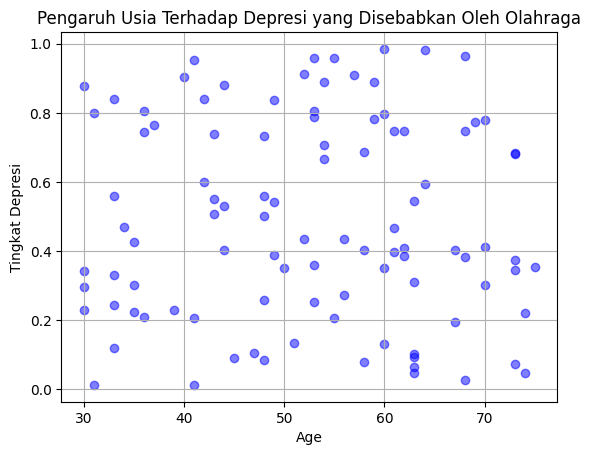

In [ ]:
# data usia
Age = np.random.randint(29, 77, size=100)

# tingkat depresi yang disebabkan oleh olahraga
tingkat_depresi = np.random.uniform(0, 1, size=100)

# plotting data
plt.scatter(Age, tingkat_depresi, color='blue', alpha=0.5)
plt.title('Pengaruh Usia Terhadap Depresi yang Disebabkan Oleh Olahraga')
plt.xlabel('Age')
plt.ylabel('Tingkat Depresi')
plt.grid(True)
plt.show()

Kesimpulan : Dapat disimpulkan bahwa kelompok usia yang paling banyak depresi karena olahraga adalah di kisaran usia 40 sampai 60 tahun, dan yang paling banyak di usia 40 tahun.

Saran : Untuk mengatasi masalah tersebut, rumah sakit atau pekerja kesehatan dapat membuat sosialisasi tentang manfaat dalam berolahraga yang dapat berguna untuk meminimalisir terkena penyakit jantung.

5. Fitur Baru "Normalisasi Tingkat Kolesterol"

In [ ]:
# membuat objek scaler Min-Max
scaler = MinMaxScaler()

# melakukan normalisasi pada fitur 'chol'
dataset['chol_normalized'] = scaler.fit_transform(dataset[['chol']])

print(dataset[['chol', 'chol_normalized']].head())

   chol  chol_normalized
0   212         0.196347
1   203         0.175799
2   174         0.109589
3   203         0.175799
4   294         0.383562


Kesimpulan : Dapat disimpulkan bahwa tingkat kolesterol dapat menjadi penyebab timbulnya penyakit jantung.

Saran : Untuk meminimalisir permasalahan tersebut, pasien dapat mengkonsumsi makanan yang tidak mengandung kolesterol.

6. Fitur Baru "Tingkat Depresi yang Disebabkan oleh Olahraga"



In [ ]:
# filter data berdasarkan kondisi tertentu terkait aktivitas fisik atau olahraga
oldpeak_olahraga = dataset[dataset['exang'] == 1]['oldpeak'] # exang = 1 menandakan adanya angina yang diinduksi oleh olahraga

print("Statistik Deskriptif Tingkat Depresi yang Disebabkan oleh Olahraga:")
print(oldpeak_olahraga.describe())

Statistik Deskriptif Tingkat Depresi yang Disebabkan oleh Olahraga:
count    345.000000
mean       1.584058
std        1.248723
min        0.000000
25%        0.600000
50%        1.500000
75%        2.500000
max        5.600000
Name: oldpeak, dtype: float64


In [ ]:
# membuat kolom baru 'Rata-rata Oldpeak Akibat Olahraga' yang menunjukkan rata-rata tingkat depresi yang disebabkan oleh olahraga untuk setiap pasien
dataset['olpeak_exang'] = dataset.groupby('exang')['oldpeak'].transform('mean')

print(dataset)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  ca  thal  target  age_category chol_trestbps_ratio  status_ratio

Kesimpulan : Dapat disimpulkan bahwa aktivitas fisik atau olahraga dapat mempengaruhi kondisi kesehatan pasien yang terkena penyakit jantung.

Saran : Pasien dapat mengurangi olahraga apabila penyakit jantungnya sudah parah.

7. Fitur Baru "Tekanan Darah yang Menyebabkan Penyakit Jantung"

In [ ]:
# menentukan jenis tekanan darah yang paling banyak menyebabkan penyakit jantung
tekanan_darah_penyakit = dataset.groupby(['target']).agg({'trestbps': 'mean'}).reset_index()

print("Rata-rata Tekanan Darah (trestbps) untuk Pasien dengan dan tanpa Penyakit Jantung:")
print(tekanan_darah_penyakit)

Rata-rata Tekanan Darah (trestbps) untuk Pasien dengan dan tanpa Penyakit Jantung:
   target    trestbps
0       0  134.106212
1       1  129.245247


Kesimpulan : Dapat disimpulkan bahwa pasien yang terkena penyakit jantung (target = 1) memiliki tekanan darah 129, sedangkan yang tidak menderita penyakit jantung (target = 0) adalah 134. Hal ini menunjukkan bahwa rata-rata tekanan darah tampaknya sedikit lebih rendah pada kelompok pasien yang menderita penyakit jantung (target = 1) dibandingkan kelompok yang tidak menderita penyakit jantung (target = 0).  

Saran : Pasien dapat mengonsumsi obat penambah darah agar dapat meminimalisir terkena penyakit jantung.

8. Fitur Baru "Gula Darah pada Pasien Penderita Penyakit Jantung"

In [ ]:
# menambahkan kolom baru 'Blood Sugar in Patients with Heart Disease' dengan mengisi nilai berdasarkan kondisi
dataset['Blood Sugar in Patients with Heart Disease'] = dataset.loc[dataset['target'] == 1, 'chol']

print(dataset)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  thal  target  age_category  chol_trestbps_ratio status_ratio  \


In [ ]:
# filter data untuk hanya menyertakan pasien yang memiliki penyakit jantung
pasien_penyakit_jantung = dataset[dataset['target'] == 1]

# menghitung rata-rata gula darah pada pasien dengan penyakit jantung
rata_rata_gula_darah = pasien_penyakit_jantung['fbs'].mean()

print("Rata-rata Gula Darah pada Pasien dengan Penyakit Jantung:", rata_rata_gula_darah)

Rata-rata Gula Darah pada Pasien dengan Penyakit Jantung: 0.13498098859315588


Kesimpulan : Rata-rata gula darah pada pasien dengan penyakit jantung adalah sekitar 0.135. Ini menunjukkan bahwa mayoritas pasien dengan penyakit jantung memiliki nilai fasting blood sugar yang rendah. Dalam hal ini, nilai rata-rata yang rendah menunjukkan bahwa mayoritas pasien dengan penyakit jantung dalam dataset memiliki kadar glukosa darah puasa yang normal atau rendah.

Saran : Pasien yang terkena penyakit jantung mungkin dapat melakukan pengobatan ke rumah sakit agar tidak menimbulkan komplikasi.

9. Fitur Baru "Pasien yang Dapat Terkena Stroke apabila Tekanan Darah Tinggi"

In [ ]:
# menambahkan kolom baru 'high_blood_pressure_stroke' yang menunjukkan jumlah pasien dengan tekanan darah tinggi dan mengalami stroke
dataset['high_blood_pressure_stroke'] = 0

# menghitung jumlah pasien dengan tekanan darah tinggi dan mengalami stroke
jumlah_pasien_tekanan_darah_tinggi_stroke = dataset[(dataset['trestbps'] > 140) & (dataset['target'] == 1)].shape[0]

# mengupdate nilai kolom 'high_blood_pressure_stroke' sesuai dengan jumlah pasien yang memiliki tekanan darah tinggi dan mengalami stroke
dataset.loc[dataset['trestbps'] > 140, 'high_blood_pressure_stroke'] = jumlah_pasien_tekanan_darah_tinggi_stroke

print(dataset)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  target  age_category  chol_trestbps_ratio  status_ratio  \
0    

Kesimpulan : Terdapat pasien yang mungkin dapat terkena stroke karena tekanan darah tinggi.

Saran : Pasien dapat menjaga tekanan darahnya supaya tidak sampai terkena stroke.

10. Fitur Baru "Risiko Penyakit Jantung Berdasarkan Faktor Tekanan Darah, Kadar Kolesterol, dan Detak Jantung"

In [ ]:
# menambahkan kolom baru 'Heart Disease Risk Score' berdasarkan beberapa faktor risiko
# menggunakan nilai tekanan darah (trestbps), kadar kolesterol (chol), dan detak jantung (thalach) sebagai faktor risiko
dataset['Heart Disease Risk Score'] = dataset['trestbps'] + dataset['chol'] - dataset['thalach']

print(dataset)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  age_category  chol_trestbps_ratio  status_ratio  \
0     ...    

In [ ]:
# menentukan Heart Disease Risk Score tertinggi
risk_score_tertinggi = dataset['Heart Disease Risk Score'].max()

print("Heart Disease Risk Score tertinggi adalah:", risk_score_tertinggi)

Heart Disease Risk Score tertinggi adalah: 519


Kesimpulan : Dapat disimpulkan bahwa skor tertinggi terhadap risiko penyakit jantung yang disebabkan oleh tekanan darah, kadar kolesterol, dan detak jantung adalah 519.

Saran : Pasien dapat memperhatikan terkait risiko yang dapat menyebabkan penyakit jantung.